In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from itertools import cycle

In [2]:
def transform_data(data: pd.DataFrame) -> pd.DataFrame:
    data.drop(columns=['Index', 'SMU-1 Time (s)', 'Resistance (Ohm)'], inplace=True)
    data.rename(columns={'SMU-1 Voltage (V)':'Voltage', 'SMU-1 Current (A)':'Current'}, inplace=True)
    data.Current = data.Current * 10**6
    
    return data

In [3]:
dfs_cold = []
dfs_hot = []

for file_path in glob.iglob('/kaggle/input/fwd-rev-2023/cold/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_cold.append(data)
    
for file_path in glob.iglob('/kaggle/input/fwd-rev-2023/hot/*.txt'):
    data = pd.read_csv(file_path, sep='\t')
    transform_data(data)
    
    dfs_hot.append(data)

In [4]:
colors = ['r', 'b', 'g', 'c', 'm', 'k']
linestyles = ['-', '--', '-.', ':']

color_cycle = cycle(colors)
linestyle_cycle = cycle(linestyles)

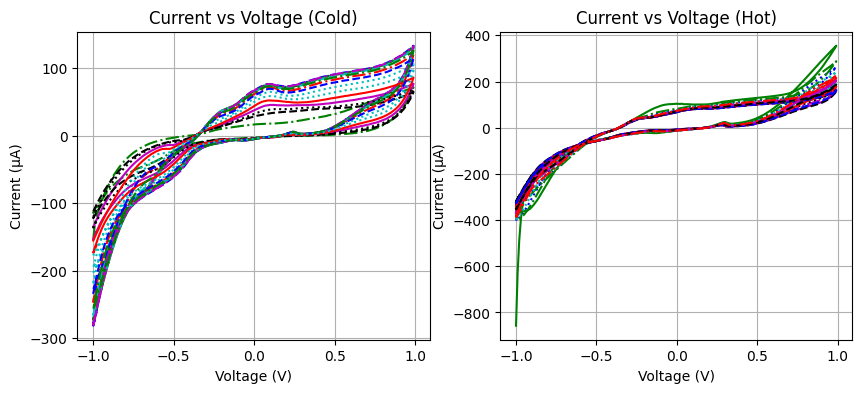

In [21]:
figure, axis = plt.subplots(1, 2, figsize=(10, 4)) 


for i in range(len(dfs_cold)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    axis[0].plot(dfs_cold[i].Voltage, dfs_cold[i].Current, linestyle=linestyle, color=color, linewidth=1.5, label=f'Graph {i+1}')
    
for i in range(len(dfs_hot)):
    color = next(color_cycle)
    linestyle = next(linestyle_cycle)
    axis[1].plot(dfs_hot[i].Voltage, dfs_hot[i].Current, linestyle=linestyle, color=color, linewidth=1.5, label=f'Graph {i+1}')
    
axis[0].set_title('Current vs Voltage (Cold)')
axis[1].set_title('Current vs Voltage (Hot)')

axis[0].set_xlabel('Voltage (V)')
axis[0].set_ylabel('Current (μA)')

axis[1].set_xlabel('Voltage (V)')
axis[1].set_ylabel('Current (μA)')

axis[0].grid(True)
axis[1].grid(True)
plt.show()